### Foreseeing Variable Problems

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### Downloading titanic dataset from openml.org

In [3]:
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
url = "https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data = pd.read_csv(url)
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('./data/titanic.csv', index=False)

### Identifying Continuous, Discrete and Categorical values from the datasets

* Continuous - usually of float type in pandas
* Discrete - usually int type in pandas
* categorical - usually of object type in pandas

In [4]:
titanic_data = pd.read_csv('./data/titanic.csv')
titanic_data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
### inspecting the discrete values of 'sibsp'
titanic_data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [6]:
# inspecting the continuous values of 'fare'
titanic_data['fare'].unique()

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333,  35.5   ,  31.    , 164.8667, 262.375 ,
        55.    ,  30.5   ,  50.4958,  39.6   ,  27.7208, 134.5   ,
        26.2875,  27.4458, 512.3292,   5.    ,  47.1   , 120.    ,
        61.175 ,  53.1   ,  86.5   ,  29.7   , 136.7792,  52.    ,
        25.5875,  83.1583,  25.7   ,  71.    ,  71.2833,  57.    ,
        81.8583, 106.425 ,  56.9292,  78.2667,  31.6792,  31.6833,
       110.8833,  26.3875,  27.75  , 263.    , 133.65  ,  49.5   ,
        79.2   ,  38.5   , 211.5   ,  59.4   ,  89.1042,  34.6542,
        28.5   , 153.4625,  63.3583,  55.4417,  76.7292,  42.4   ,
        83.475 ,  93.5   ,  42.5   ,  51.8625,  50.    ,  57.9792,
        90.    ,  30.6958,  80.    ,  28.7125,  25.9292,  39.4   ,
        45.5   , 146.5208,  82.1708,  57.75  , 113.275 ,  26.2

In [7]:
# inspecting the values of embarked
titanic_data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

#### The values are categorical

In [8]:
# inspecting the values of cabin
titanic_data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


#### the values are mix of string and number - this is a mixed variable

## Using histograms to identify the variables

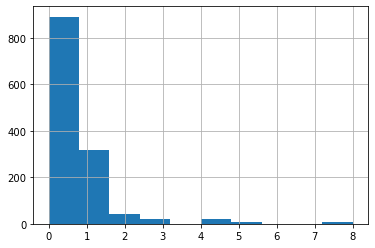

In [9]:
titanic_data['sibsp'].hist()

#### The sibsp values occupy the whole values - indicating discrete variable

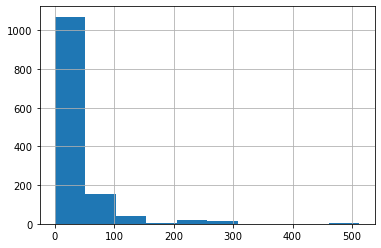

In [10]:
titanic_data['fare'].hist()

#### The fare values occupies all values within a given range eg: (0-100) - indicating that it is continuous variable

## Quantifying missing data

#### KDD-CUP-98 dataset

In [11]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
kdd_data = pd.read_csv('./data/cup98LRN.txt', usecols = cols)
kdd_data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [12]:
# numbers of missing values
kdd_data.isnull().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [13]:
kdd_data.isnull().mean()

AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

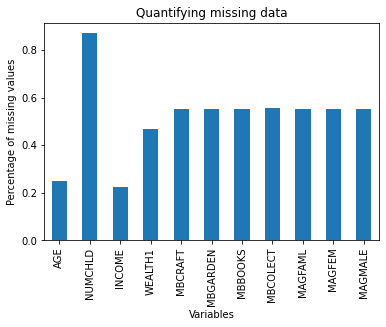

In [14]:
### bar plot with missing variable percentage with the variable
kdd_data.isnull().mean().plot.bar()
plt.xlabel('Variables')
plt.ylabel('Percentage of missing values')
plt.title('Quantifying missing data')
plt.show()

## Cardinality in categorical values

* number of unique categories in a variable is called cardinality

In [15]:
# lets load few categorical variables
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
data = pd.read_csv('./data/cup98LRN.txt', usecols=cols)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,,X


In [16]:
data = data.replace(' ', np.nan)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [17]:
data.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

In [18]:
data.nunique(dropna=False)

DOMAIN      17
GENDER       7
RFA_2       14
RFA_15      34
MDMAUD_A     5
dtype: int64

In [19]:
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

Text(0.5, 1.0, 'Cardinality')

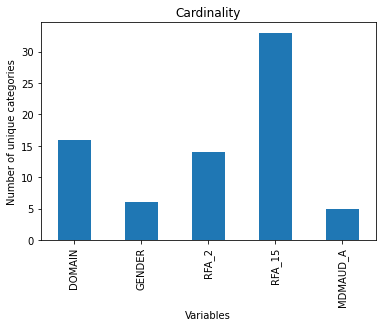

In [20]:
data.nunique().plot.bar()
plt.xlabel('Variables')
plt.ylabel('Number of unique categories')
plt.title('Cardinality')

### rare categories in categorical variable

In [21]:
data = pd.read_csv('./data/car.data', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot',
'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [22]:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [23]:
# gives the total number of each class category
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [24]:
# percentage of each class category
labels_freq = data['class'].value_counts()/len(data)
labels_freq

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

### Bar plot of the frequency

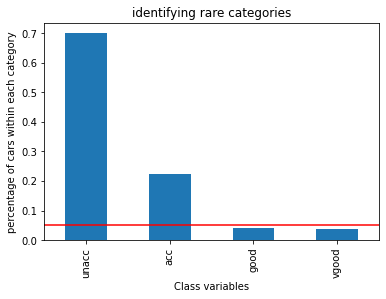

In [25]:
labels_freq.sort_values(ascending=False).plot.bar()
plt.axhline(y=0.05, color='red')
plt.xlabel('Class variables')
plt.ylabel('percentage of cars within each category')
plt.title('identifying rare categories')
plt.show()

### Finding the linear relationship between varibles using scatter plots and residual plots

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# x follows normal distribution
np.random.seed(42)
x = np.random.randn(1000)

In [29]:
# create y that is linearly dependent on x with some added noise
y = x*10 + np.random.randn(1000) * 2

In [30]:
data = pd.DataFrame([x,y]).T
data.columns= ['x','y']

Text(1.6749999999999972, 0.5, 'Target Variable Y')

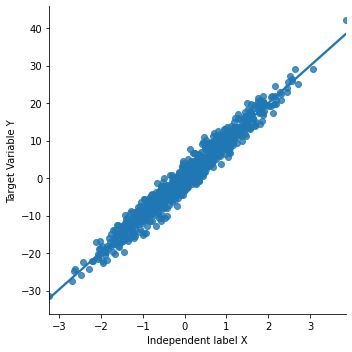

In [45]:
# linear plot, order=1 means its a linear model
sns.lmplot(x='x',y='y',data=data, order=1)
plt.xlabel('Independent label X')
plt.ylabel('Target Variable Y')

In [38]:
# residual plots
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

In [39]:
y_preds = linreg.predict(data['x'].to_frame())

In [40]:
residuals = data['y'] - y_preds

Text(0, 0.5, 'Residuals')

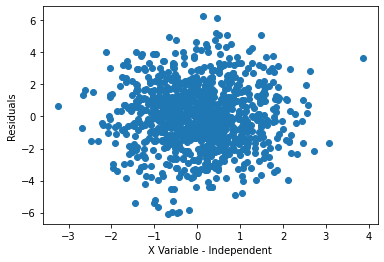

In [42]:
plt.scatter(x=data['x'], y=residuals)
plt.xlabel('X Variable - Independent')
plt.ylabel('Residuals')

Text(0.5, 0, 'Residuals')

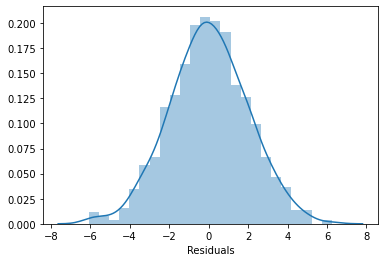

In [44]:
# Distribution of the residuals
sns.distplot(residuals)
plt.xlabel('Residuals')

#### The residuals are centered around zero(0) in the above graph

### Identifying normal distribution

#### Using Q-Q Plots

In [46]:
import scipy.stats as stats

In [49]:
x = np.random.randn(200)
x.shape

(200,)

In [54]:
data = pd.DataFrame([x])
data

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.804348,-0.190904,0.719758,-1.293273,-0.956436,0.472406,1.484116,0.355613,-0.313058,-0.000709,...,-1.846188,-0.929511,-1.496529,-0.650024,-0.083438,-1.449645,-0.92186,-1.003957,0.207267,0.069344


In [55]:
data = pd.DataFrame([x]).T
data

,0
0,1.804348
1,-0.190904
2,0.719758
3,-1.293273
4,-0.956436
...,...
195,-1.449645
196,-0.921860
197,-1.003957
198,0.207267


In [56]:
data.columns = ['x']
data

,x
0,1.804348
1,-0.190904
2,0.719758
3,-1.293273
4,-0.956436
...,...
195,-1.449645
196,-0.921860
197,-1.003957
198,0.207267


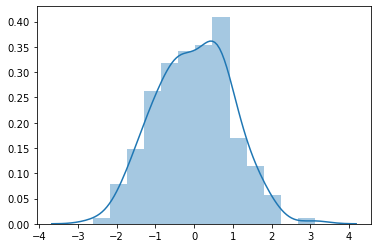

In [57]:
sns.distplot(x)

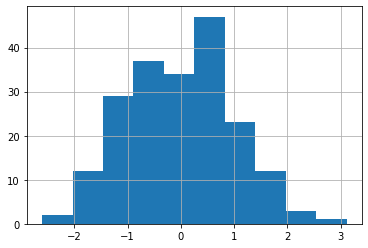

In [63]:
data['x'].hist()

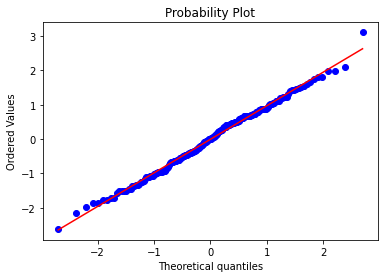

In [64]:
## create Q-Q plots
stats.probplot(data['x'], dist='norm', plot=plt)
plt.show()

### Identifying linear relationship on boston dataset

In [65]:
from sklearn.datasets import load_boston

In [69]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [68]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns= boston_dataset.feature_names)

# adding the target
# MEDV = median value of the house prices
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


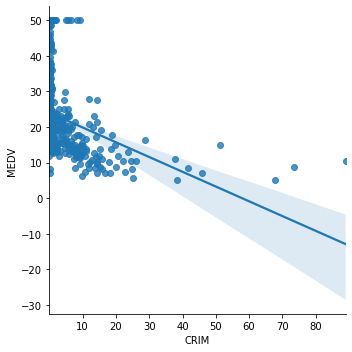

In [70]:
sns.lmplot(x='CRIM',y='MEDV',data=boston, order=1)

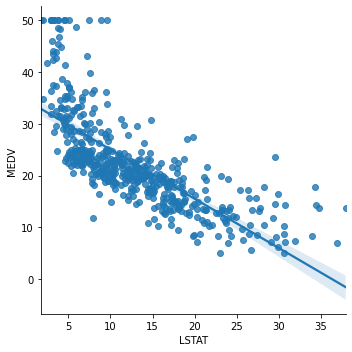

In [71]:
sns.lmplot(x='LSTAT',y='MEDV', data=boston, order=1)

### if relationship  is linear, then residuals are normally distributed and centered around zero

In [74]:
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])
y_preds = linreg.predict(boston['LSTAT'].to_frame())

residuals = boston['MEDV'] - y_preds

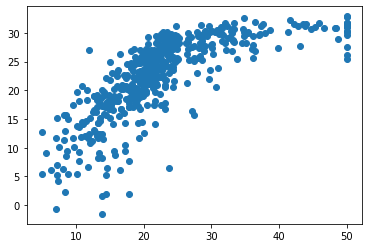

In [75]:
plt.scatter(x=boston['MEDV'], y= y_preds)

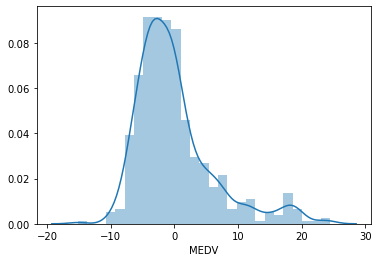

In [76]:
sns.distplot(residuals)

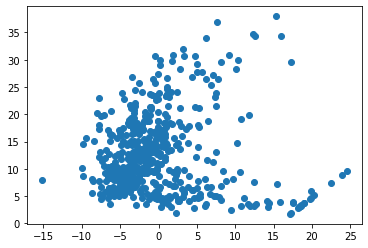

In [78]:
plt.scatter(x=residuals,y=boston['LSTAT'])

### Dont adopt a strictly gaussian distribution

### Identifying a normal distribution

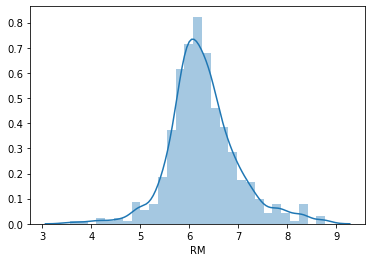

In [79]:
sns.distplot(boston['RM'])

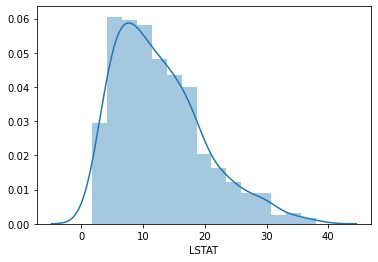

In [80]:
sns.distplot(boston['LSTAT'])

### Normality can be assessed using Q-Q plots

- In a Q-Q plot we plot the quantiles of the variable in the y-axis and the expected quantiles of the normal distribution in the x-axis. If the variable follows a normal distribution, the dots in the Q-Q plot should fall in a 45 degree diagonal line

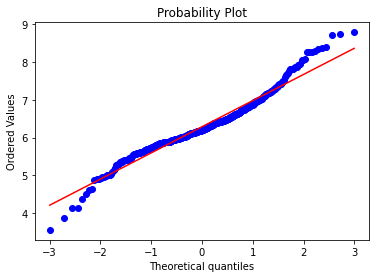

In [82]:
stats.probplot(x=boston['RM'], dist='norm', plot=plt)
plt.show()

### Most values follow gaussian distribution

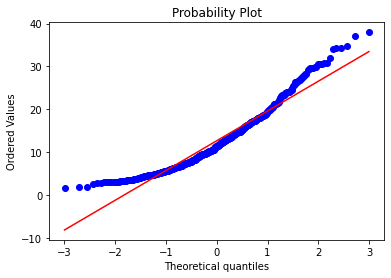

In [83]:
stats.probplot(x=boston['LSTAT'], dist='norm', plot=plt)
plt.show()

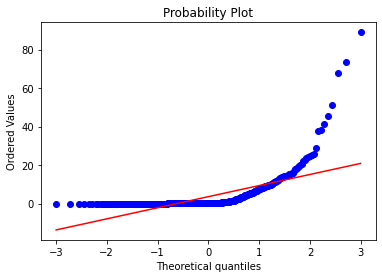

In [84]:
stats.probplot(x=boston['CRIM'], plot=plt)
plt.show()

### Does not follow normal distribution

## Distinguishing variable distribution